In [1]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [2]:
!jt -t monokai

In [1]:
import yfinance as yf
import ta
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib.pyplot import figure
figure(figsize=(6,4))
%matplotlib inline

In [2]:
df = yf.download('C38U.SI', start ='2021-01-01', end ='2022-10-05')

# let's pickle the dataframe so we don't have to hit the network every time
df.to_pickle("c38u.pickle")

# read the original frame in from cache (pickle)
df = pd.read_pickle("c38u.pickle")

[*********************100%***********************]  1 of 1 completed


In [4]:
df.Close = df['Adj Close']
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-28,1.96,1.97,1.89,1.90,1.90,42691100
2022-09-29,1.92,1.93,1.88,1.88,1.88,36010100
2022-09-30,1.88,1.94,1.87,1.92,1.92,35559900
2022-10-03,1.89,1.91,1.87,1.90,1.90,18647100
2022-10-04,1.92,1.94,1.91,1.92,1.92,11846100


In [5]:
def applyindicators(df):
    df['SMA_200'] = df.Close.rolling(200).mean()
    df['SMA_20'] = df.Close.rolling(20).mean()
    df['stddev'] = df.Close.rolling(20).std()
    df['Upper'] = df.SMA_20 + 2 * df.stddev
    df['Lower'] = df.SMA_20 - 2 * df.stddev
    df['rsi'] = ta.momentum.rsi(df.Close, 2)

In [6]:
applyindicators(df)
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi
Date,,,,,,,,,,,,
2021-01-04,2.16,2.20,2.13,2.017003,2.017003,15770900,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,2.18,2.21,2.16,2.026213,2.026213,15254500,NaN,NaN,NaN,NaN,NaN,100.000000
2021-01-06,2.21,2.26,2.21,2.072264,2.072264,26675400,NaN,NaN,NaN,NaN,NaN,100.000000
2021-01-07,2.27,2.28,2.21,2.035424,2.035424,22279800,NaN,NaN,NaN,NaN,NaN,40.740954
2021-01-08,2.23,2.28,2.20,2.090684,2.090684,24349300,NaN,NaN,NaN,NaN,NaN,78.666665
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28,1.96,1.97,1.89,1.900000,1.900000,42691100,2.087095,2.0530,0.052224,2.157448,1.948552,0.100044
2022-09-29,1.92,1.93,1.88,1.880000,1.880000,36010100,2.086791,2.0445,0.065008,2.174516,1.914484,0.068967
2022-09-30,1.88,1.94,1.87,1.920000,1.920000,35559900,2.086596,2.0385,0.070731,2.179962,1.897038,55.438048


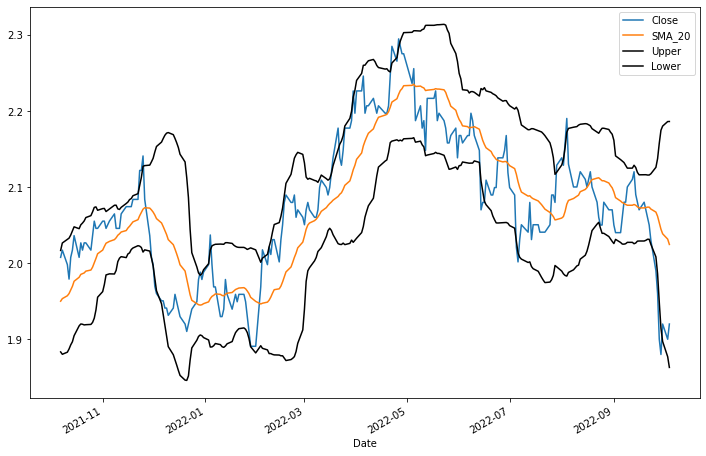

In [7]:
sbb = df.tail(250)[['Close', 'SMA_20', 'Upper', 'Lower']].plot(style ={'Upper':'black', 'Lower':'black'})
sbb.figure.set_size_inches(12,8)

In [10]:
applyindicators(df)

In [12]:
def conditions(df):
    df['Buy'] = np.where((df.Close > df.SMA_200) &
                        (df.Close <df.Lower) &
                         (0.97 * df.Close >= df.Low.shift(-1)), 1, 0)
    
    df['Sell'] = np.where((df.rsi >50), 1, 0)
    
    df['Buyprice'] = 0.97 * df.Close
    df['Sellprice'] = df.Open.shift(-1)

In [14]:
conditions(df)
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2021-01-04,2.16,2.20,2.13,2.017004,2.017004,15770900,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.956494,2.18
2021-01-05,2.18,2.21,2.16,2.026214,2.026214,15254500,NaN,NaN,NaN,NaN,NaN,100.000000,0,1,1.965427,2.21
2021-01-06,2.21,2.26,2.21,2.072264,2.072264,26675400,NaN,NaN,NaN,NaN,NaN,100.000000,0,1,2.010096,2.27
2021-01-07,2.27,2.28,2.21,2.035424,2.035424,22279800,NaN,NaN,NaN,NaN,NaN,40.740613,0,0,1.974361,2.23
2021-01-08,2.23,2.28,2.20,2.090684,2.090684,24349300,NaN,NaN,NaN,NaN,NaN,78.666680,0,1,2.027963,2.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23,2.05,2.06,2.02,2.030000,2.030000,27485500,2.086912,2.0710,0.023147,2.128868,2.013132,2.355365,0,0,1.969100,2.02
2022-09-26,2.02,2.04,1.98,1.990000,1.990000,27131100,2.087157,2.0670,0.029397,2.140494,1.993506,0.644926,0,0,1.930300,2.00
2022-09-27,2.00,2.00,1.95,1.960000,1.960000,25398900,2.087253,2.0615,0.037874,2.156186,1.966814,0.308683,0,0,1.901200,1.96
